Reading wiki page

In [1]:
import pandas as pd
import wikipedia as wp
   
#Get the html source
html = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")
df = pd.read_html(html)[0]
df.to_csv('beautifulsoup_pandas.csv',header=0,index=False)
print (df)

    Postcode           Borough          Neighbourhood
0        M1A      Not assigned           Not assigned
1        M2A      Not assigned           Not assigned
2        M3A        North York              Parkwoods
3        M4A        North York       Victoria Village
4        M5A  Downtown Toronto           Harbourfront
..       ...               ...                    ...
282      M8Z         Etobicoke              Mimico NW
283      M8Z         Etobicoke     The Queensway West
284      M8Z         Etobicoke  Royal York South West
285      M8Z         Etobicoke         South of Bloor
286      M9Z      Not assigned           Not assigned

[287 rows x 3 columns]


In [2]:
df

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
...,...,...,...
282,M8Z,Etobicoke,Mimico NW
283,M8Z,Etobicoke,The Queensway West
284,M8Z,Etobicoke,Royal York South West
285,M8Z,Etobicoke,South of Bloor


dropping not assigned borough

In [3]:
indexNames = df[ df['Borough'] == 'Not assigned' ].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [4]:
df

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
...,...,...,...
281,M8Z,Etobicoke,Kingsway Park South West
282,M8Z,Etobicoke,Mimico NW
283,M8Z,Etobicoke,The Queensway West
284,M8Z,Etobicoke,Royal York South West


In [5]:
df.replace(to_replace ="Not assigned", 
                 value =df['Borough']) 


,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
...,...,...,...
281,M8Z,Etobicoke,Kingsway Park South West
282,M8Z,Etobicoke,Mimico NW
283,M8Z,Etobicoke,The Queensway West
284,M8Z,Etobicoke,Royal York South West


In [6]:
result = df.groupby(['Postcode','Borough'], sort=False).agg( ','.join)


In [7]:
result

,,Neighbourhood
Postcode,Borough,
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,Harbourfront
M6A,North York,"Lawrence Heights,Lawrence Manor"
M7A,Downtown Toronto,Queen's Park
...,...,...
M8X,Etobicoke,"The Kingsway,Montgomery Road,Old Mill North"
M4Y,Downtown Toronto,Church and Wellesley
M7Y,East Toronto,Business Reply Mail Processing Centre 969 Eastern


In [8]:
postal_data = pd.read_csv("Geospatial_Coordinates.csv") 


In [9]:
postal_data

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


In [11]:
postal_data.columns=['Postcode','Latitude','Longitude']
full_data=result.merge(postal_data,
                 on='Postcode',how='left')


In [12]:
full_data

,Postcode,Neighbourhood,Latitude,Longitude
0,M3A,Parkwoods,43.753259,-79.329656
1,M4A,Victoria Village,43.725882,-79.315572
2,M5A,Harbourfront,43.654260,-79.360636
3,M6A,"Lawrence Heights,Lawrence Manor",43.718518,-79.464763
4,M7A,Queen's Park,43.662301,-79.389494
...,...,...,...,...
98,M8X,"The Kingsway,Montgomery Road,Old Mill North",43.653654,-79.506944
99,M4Y,Church and Wellesley,43.665860,-79.383160
100,M7Y,Business Reply Mail Processing Centre 969 Eastern,43.662744,-79.321558
101,M8Y,"Humber Bay,King's Mill Park,Kingsway Park Sout...",43.636258,-79.498509


In [13]:
X = full_data[['Latitude', 'Longitude']].values


In [14]:
from sklearn.cluster import KMeans


In [16]:
Ks = range(1, 10)
kmean = [KMeans(n_clusters=i).fit(X) for i in Ks]
kmean


[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorit

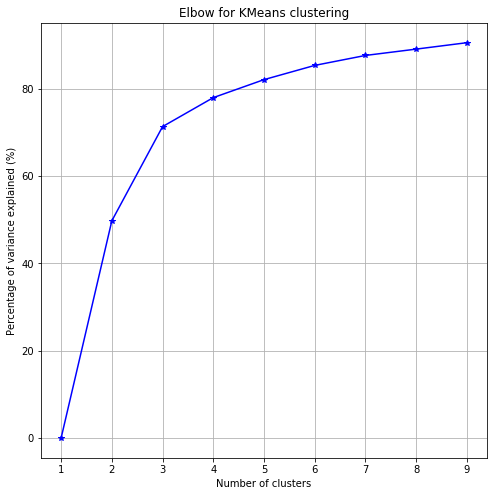

In [22]:
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt


def plot_elbow(kmean, X):
    centroids = [k.cluster_centers_ for k in kmean]
    D_k = [distance.cdist(X, center, 'euclidean') for center in centroids]
    dist = [np.min(D,axis=1) for D in D_k]

    # Total with-in sum of square
    wcss = [sum(d**2) for d in dist]
    tss = sum(distance.pdist(X)**2)/X.shape[0]
    bss = tss-wcss

    plt.subplots(nrows=1, ncols=1, figsize=(8,8))
    ax = plt.subplot(1, 1, 1)
    ax.plot(Ks, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained (%)')
    plt.title('Elbow for KMeans clustering')
    plt.show()

plot_elbow(kmean, X)


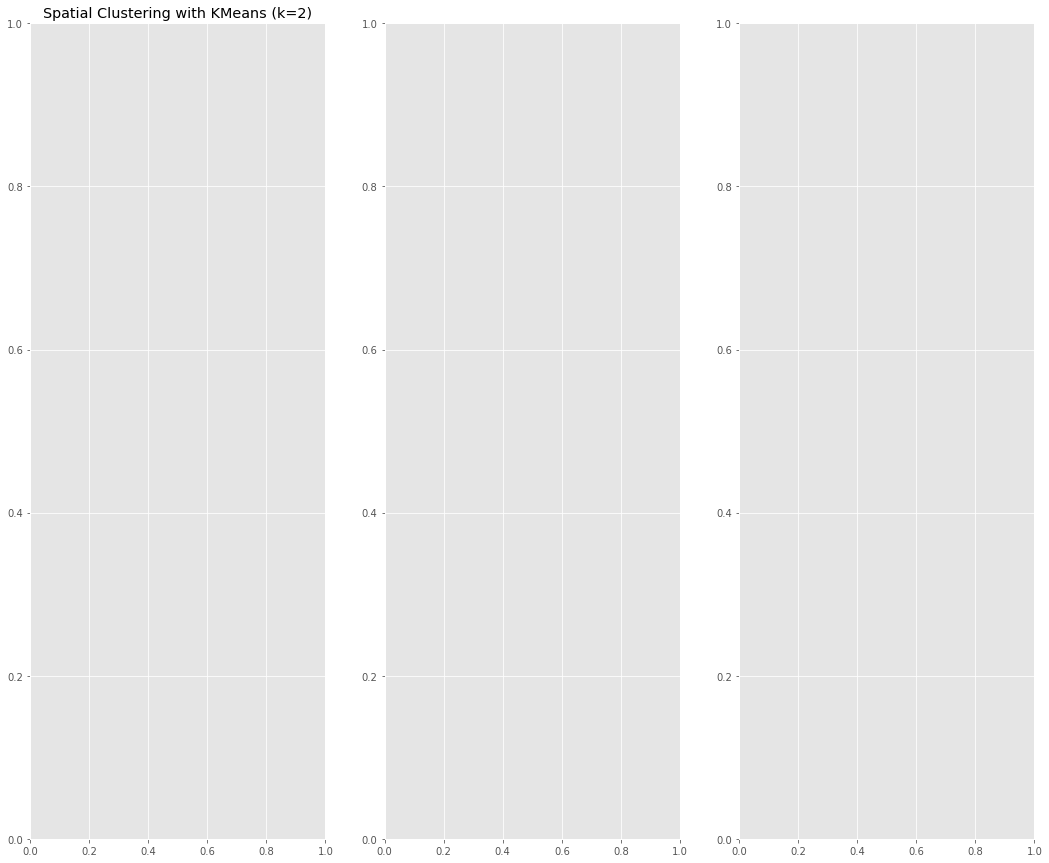

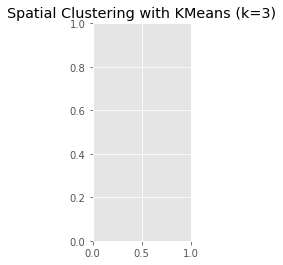

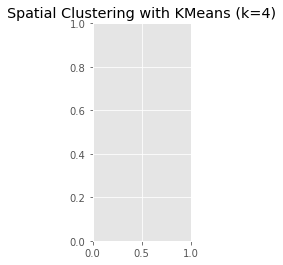

In [32]:
from matplotlib.pyplot import *


k = [2, 3, 4]
n = len(k)
plt.subplots(nrows=1, ncols=3, figsize=(18,15))

for i in range(n):
    est = kmean[k[i]-1]
    full_data['cluster'] = est.predict(X).tolist()
    
    ax = plt.subplot(1, 3, i+1)
    ax.set_title("Spatial Clustering with KMeans (k={})".format(k[i]))

    plot_stations_map(ax, full_data)
